In [77]:
# Find path to PySpark.
import findspark
findspark.init('/Users/Steve/spark-2.0.2-bin-hadoop2.6')

# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

In [78]:

#Print first 5 elements of RDD
raw_data = sc.textFile("daily_show.tsv")
raw_data.take(5)


['YEAR\tGoogleKnowlege_Occupation\tShow\tGroup\tRaw_Guest_List',
 '1999\tactor\t1/11/1999\tActing\tMichael J. Fox',
 '1999\tComedian\t1/12/1999\tComedy\tSandra Bernhard',
 '1999\ttelevision actress\t1/13/99\tActing\tTracey Ullman',
 '1999\tfilm actress\t1/14/99\tActing\tGillian Anderson']

In [79]:
#From the output above, we see the data is delimited by "\t". Let's apply a map function to splice each entry.
splice_data = raw_data.map(lambda splice : splice.split('\t'))
splice_data.take(5)

[['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'],
 ['1999', 'actor', '1/11/1999', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/1999', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson']]

In [80]:
#Goal: Tally number of guests in each year
#Create tuple consisting of (year, 1) for each guest
guest_counter = splice_data.map(lambda row: (row[0] ,1))
guest_counter.take(5)

[('YEAR', 1), ('1999', 1), ('1999', 1), ('1999', 1), ('1999', 1)]

In [81]:
#Reduce entries by summing the second entry in the tuple for each year
guest_counter_sum = guest_counter.reduceByKey(lambda x, y: x+y)
guest_counter_sum.collect()

[('YEAR', 1),
 ('2012', 164),
 ('2013', 166),
 ('2004', 164),
 ('2011', 163),
 ('2014', 163),
 ('2002', 159),
 ('2007', 141),
 ('2015', 100),
 ('2003', 166),
 ('2010', 165),
 ('2001', 157),
 ('2000', 169),
 ('2008', 164),
 ('2005', 162),
 ('2009', 163),
 ('1999', 166),
 ('2006', 161)]

In [82]:
#Goal: Use filter remove title row ('YEAR', 1) from RDD

def filter_year(row):
    if row[0] == 'YEAR':
        return False
    else:
        return True
    
guest_counter_sum = guest_counter_sum.filter( lambda row: filter_year(row))

guest_counter_sum.collect()

[('2012', 164),
 ('2013', 166),
 ('2004', 164),
 ('2011', 163),
 ('2014', 163),
 ('2002', 159),
 ('2007', 141),
 ('2015', 100),
 ('2003', 166),
 ('2010', 165),
 ('2001', 157),
 ('2000', 169),
 ('2008', 164),
 ('2005', 162),
 ('2009', 163),
 ('1999', 166),
 ('2006', 161)]

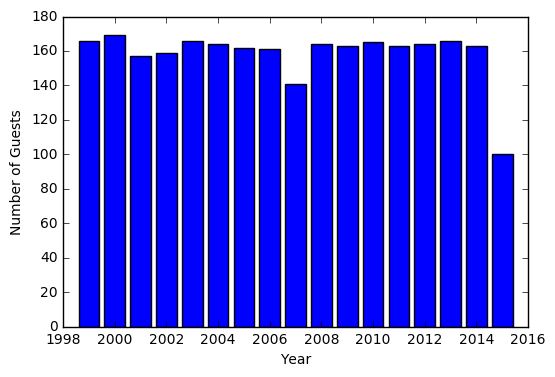

In [84]:
#Plot bar graph of guest number over years
guest_year_bar = guest_counter_sum.collect()

import matplotlib.pyplot as plt
years =[int(x[0]) for x in guest_year_bar]
guests = [x[1] for x in guest_year_bar]
fig = plt.figure()
sub = fig.add_subplot(111)
sub.bar(left=years, height=guests, align = 'center')
#sub.set_xaxis([min(years),max(years)])
sub.set_xlabel('Year')
sub.set_ylabel('Number of Guests')
plt.show()

In [85]:
#Combine filter/map/reduce functions
#Find guests with non-empty professions, lower case entries, tally number, and take 10 largest tallies

profession_tally = splice_data.filter(lambda row: row[1] != '')\
    .map(lambda row: (row[1].lower(), 1))\
    .reduceByKey(lambda x, y: x+y)\
    .takeOrdered(10, key= lambda x : -x[1] )

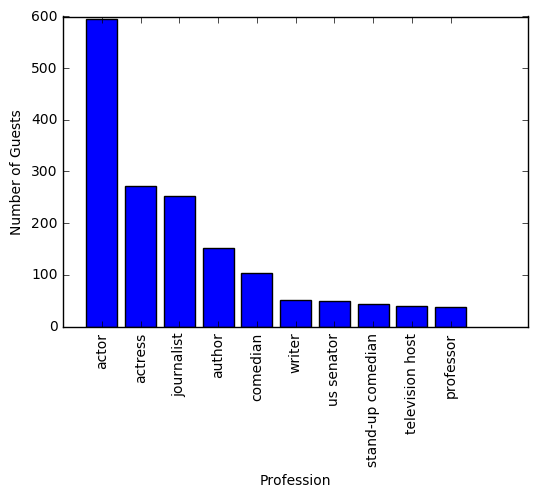

In [86]:
#Plot bar graph of 10 most popular professions

professions =[x[0] for x in profession_tally]
guest_count = [x[1] for x in profession_tally]
fig2 = plt.figure()
sub = fig2.add_subplot(111)
sub.bar(left=range(1,len(guest_count)+1), height=guest_count, align = 'center')
#sub.set_xaxis([min(years),max(years)])
sub.set_xlabel('Profession')
sub.set_ylabel('Number of Guests')
sub.set_xticks(range(1,len(guest_count)+1))
sub.set_xticklabels(professions, rotation = 90)
sub.set_xlim(right = len(guest_count)+1)
sub.set_title('Most Frequent Professions to Visit Daily Show')
plt.show()

In [87]:
sc.stop()
